In [1]:
import tensorflow as tf 
print(tf.__version__)

2.1.0


In [2]:
import tensorflow_datasets as tfds 
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.2)
config=tf.compat.v1.ConfigProto(gpu_options=gpu_options)
session = tf.compat.v1.Session(config=config)
imdb,info=tfds.load('imdb_reviews/subwords8k',with_info=True,as_supervised=True) 

train_data1,test_data1=imdb['train'],imdb['test'] 

tokenizer=info.features['text'].encoder 


In [3]:

sample_string='TensorFlow, from basic to mastery'
tokenized_string =tokenizer.encode(sample_string) 
print('Tokenized string is {}'.format(tokenized_string))



Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 2715, 7, 2652, 8050]


In [4]:

original_string=tokenizer.decode(tokenized_string) 
print('The original string : {}'.format(original_string))

The original string : TensorFlow, from basic to mastery


In [5]:
for ts in tokenized_string:
    print('{} ----->{}'.format(ts,tokenizer.decode([ts])))

6307 ----->Ten
2327 ----->sor
4043 ----->Fl
2120 ----->ow
2 ----->, 
48 ----->from 
2715 ----->basic 
7 ----->to 
2652 ----->master
8050 ----->y


In [6]:
embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [8]:
tokenizer.vocab_size*embedding_dim

523840

In [9]:
num_epochs = 50

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
 
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_data1 = train_data1.shuffle(BUFFER_SIZE)
train_data = train_data1.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_data1))
test_data= test_data1.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data1))

# train_data = train_data1.map(lambda x_text, x_label: (x_text, tf.expand_dims(x_label, -1)))
# test_data = test_data1.map(lambda x_text, x_label: (x_text, tf.expand_dims(x_label, -1)))

history = model.fit(train_data, epochs=num_epochs, validation_data=test_data)

Epoch 1/50
391/391 [==============================] - 91s 233ms/step - loss: 0.5464 - accuracy: 0.7260 - val_loss: 0.7162 - val_accuracy: 0.5262
Epoch 2/50
391/391 [==============================] - 98s 250ms/step - loss: 0.3935 - accuracy: 0.8372 - val_loss: 0.4513 - val_accuracy: 0.7994
Epoch 3/50
391/391 [==============================] - 111s 285ms/step - loss: 0.2993 - accuracy: 0.8834 - val_loss: 0.4388 - val_accuracy: 0.7924
Epoch 4/50
391/391 [==============================] - 112s 286ms/step - loss: 0.2614 - accuracy: 0.9012 - val_loss: 0.5083 - val_accuracy: 0.8007
Epoch 5/50
391/391 [==============================] - 108s 275ms/step - loss: 0.3472 - accuracy: 0.8507 - val_loss: 0.4337 - val_accuracy: 0.8372
Epoch 6/50
391/391 [==============================] - 111s 284ms/step - loss: 0.2579 - accuracy: 0.8998 - val_loss: 0.5350 - val_accuracy: 0.8325
Epoch 7/50
391/391 [==============================] - 111s 285ms/step - loss: 0.1839 - accuracy: 0.9323 - val_loss: 0.5008 - v

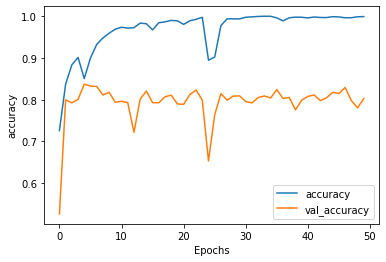

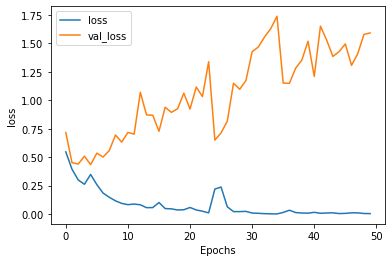

In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt 
def plot_graphs(history,string):
    plt.plot(history.history[string]) 
    plt.plot(history.history['val_'+string]) 
    plt.xlabel('Epochs') 
    plt.ylabel(string)  
    plt.legend([string,'val_'+string]) 
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")